# Diabetes Prediction Using Pima Indians Diabetes Dataset

## Introduction

The **Pima Indians Diabetes Dataset** taken from the **UCI Machine Learning Repository** contains 768 samples with 8 features related to diabetes prediction. The goal is to predict whether a person has diabetes (1) or not (0) based on medical information.

**Features**:
- **Pregnancies**: Number of pregnancies
- **Glucose**: Plasma glucose concentration
- **BloodPressure**: Diastolic blood pressure
- **SkinThickness**: Triceps skinfold thickness
- **Insulin**: 2-hour serum insulin level
- **BMI**: Body Mass Index
- **DiabetesPedigreeFunction**: Family history of diabetes
- **Age**: Age of the individual
- **Outcome**: Target variable (1 = diabetes, 0 = no diabetes)

## Objective

This report aims to analyze the dataset through **Exploratory Data Analysis (EDA)**, build a **Machine Learning** model, and evaluate its performance in predicting diabetes.

## Report Outline
1. **Dataset Overview**
2. **Data Cleaning and Preprocessing**
3. **Exploratory Data Analysis (EDA)**
4. **Model Training and Evaluation**
5. **Conclusion**


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [36]:
def load_file():
    try:
        df = pd.read_csv("diabetes.csv")
        return df
    except FileNotFoundError:
        print("Make sure you have file in this directory !")
        return None
    except Exception as e :
        print(f"Error : {str(e)}")
        return None

df = load_file()

# Reading first 5 rows of datasets

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Reading list 5 rows of datasets

In [38]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Getting information about datasets

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Observation :
The study founds that there are all together 9 columns in the datasets with 7 integers data type and 2 float data type column.

In [40]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Findings :
## The study founds that there are no null value in any column of the datasets. Incase if there was missing value or null value, we should handle with the following command:
### --> df.fillna(df.mean(numeric_only=True))

# No missing values are explicitly present, but some features (e.g., Glucose, Insulin) contain zeros, 
# which are biologically impossible and likely represent missing data.

# Handling data --> Columns where 0 is invalid (should be replaced)

In [41]:
zero_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace 0 with NaN
df[zero_columns] = df[zero_columns].replace(0, np.nan)

print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [42]:
# Impute NaNs with median
df.fillna(df.median(), inplace=True)

In [43]:
 # Verify no NaNs remain
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Checking duplicate values in the dataset

In [44]:
df.duplicated().sum()

np.int64(0)

# Findings :
The study founds that there are no duplicates value in the datasets.

# Checking basic statistics of the numerical data

In [45]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Observations:
The **Pima Indians Diabetes Dataset** exhibits a wide range of values across its features, with notable instances of missing or erroneous data, particularly 0 values in glucose, insulin, and skin thickness, which likely require imputation or removal. Key statistical observations include a higher-than-average BMI, indicating a predominantly overweight/obese population, and an age range spanning 21 to 81 years. Approximately 35% of the subjects are diagnosed with diabetes. The dataset also shows skewed distributions and potential outliers in glucose, insulin, and BMI, suggesting that data normalization, outlier handling, and preprocessing are essential steps for reliable model development and analysis.

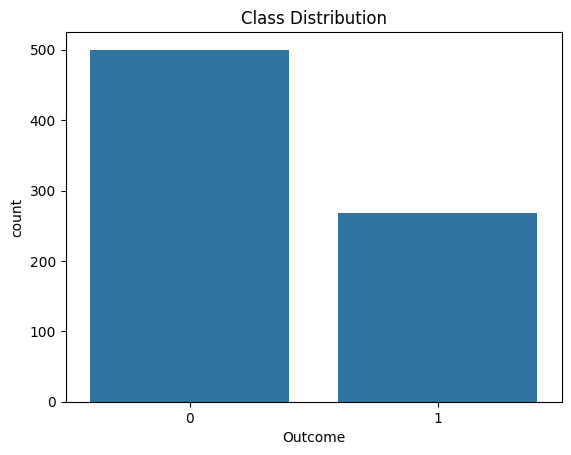

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


In [46]:
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution')
plt.show()

print(df['Outcome'].value_counts(normalize=True) * 100)

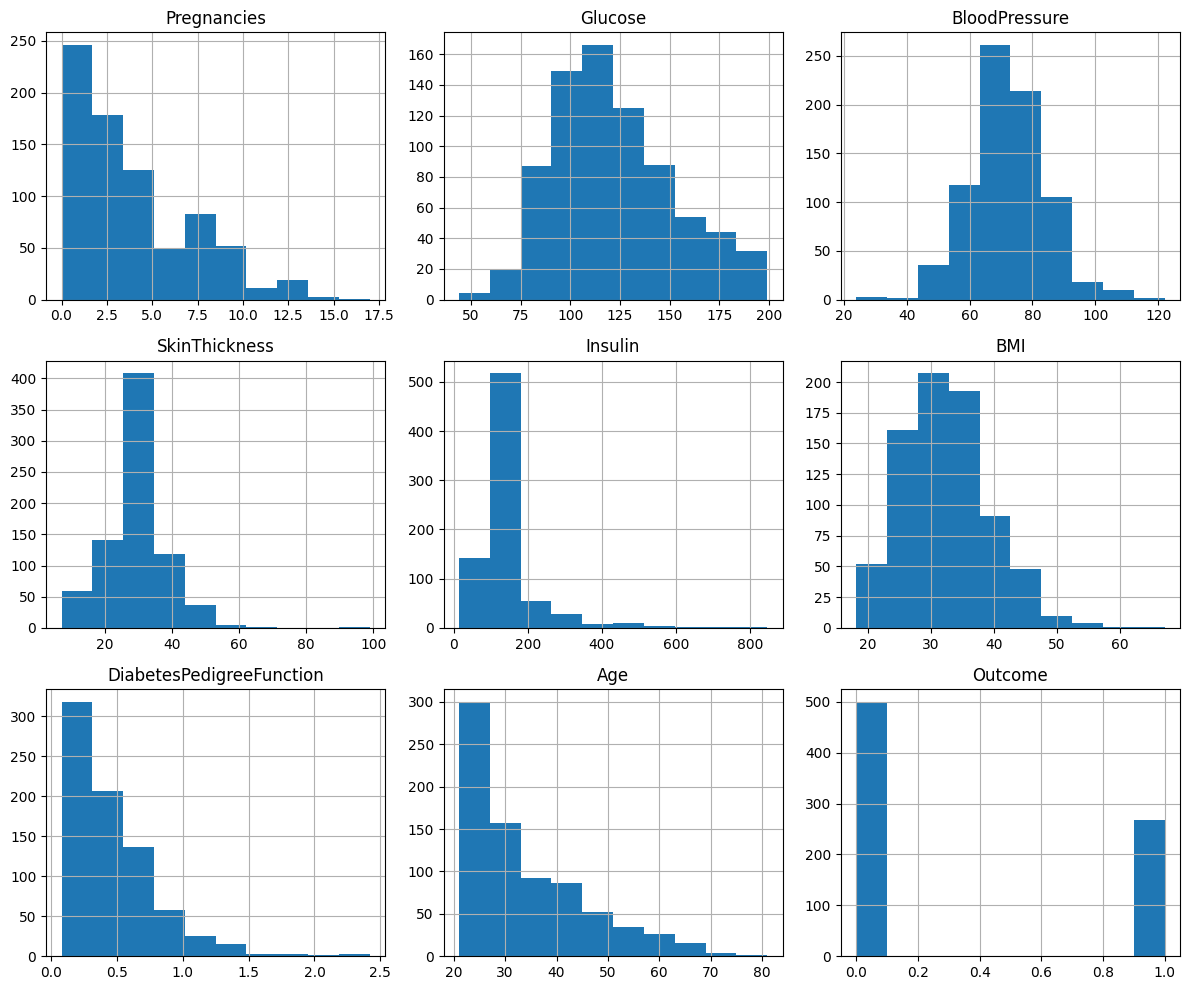

In [47]:
# Histograms for all features
df.hist(figsize=(12, 10),bins=10)
plt.tight_layout()
plt.show()

# Correlation matrix

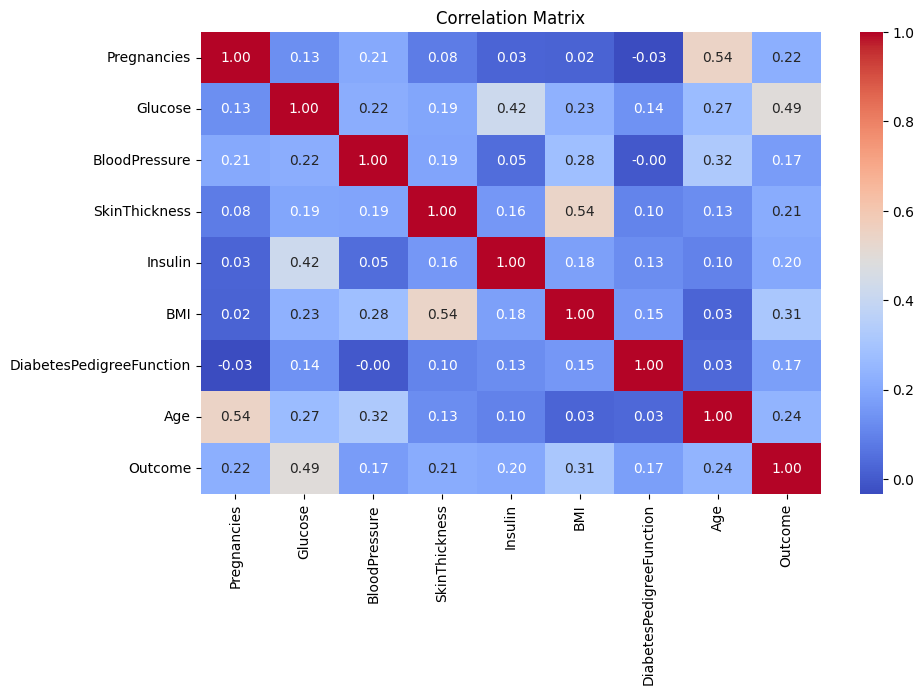

In [48]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [49]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [50]:
# Separate the classes
diabetic = df[df["Outcome"] == 1]  # Minority class
non_diabetic = df[df["Outcome"] == 0]  # Majority class

# Downsample the majority class to match the minority class size
non_diabetic_downsampled = non_diabetic.sample(n=len(diabetic), random_state=42)

# Combine both classes into a balanced dataset
df_balanced = pd.concat([diabetic, non_diabetic_downsampled])

# Check the new class distribution
print("\nBalanced Class Distribution (Downsampling):")
print(df_balanced['Outcome'].value_counts())


Balanced Class Distribution (Downsampling):
Outcome
1    268
0    268
Name: count, dtype: int64


In [51]:
df_balanced["Outcome"].value_counts()

Outcome
1    268
0    268
Name: count, dtype: int64

In [52]:
df_balanced = df_balanced.drop(columns=["DiabetesPedigreeFunction", "Insulin", "BloodPressure"])

# Heatmap with correlations

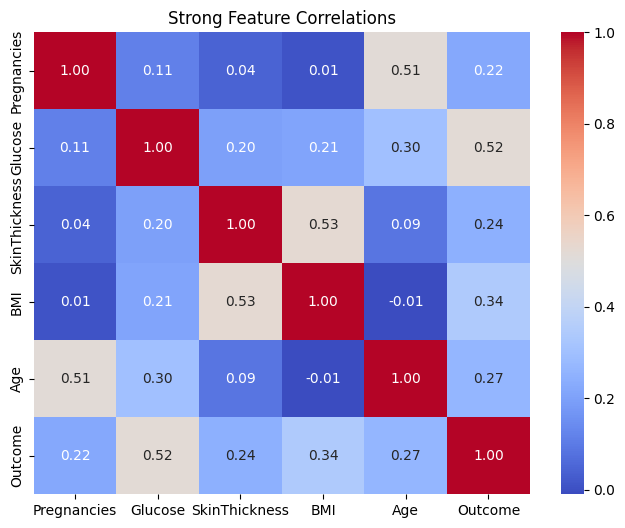

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_balanced.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Strong Feature Correlations')
plt.show()

# Features (X) and target (y)

In [54]:
X = df_balanced.drop("Outcome", axis=1)  # All columns except 'Outcome'
y = df_balanced["Outcome"]

# Split the data (80% training, 20% testing)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (428, 5)
Testing set size: (108, 5)


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [57]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

# Train the SVM with a linear kernel

In [58]:
model_linear = SVC(kernel='linear', class_weight= 'balanced', random_state=42)
model_linear.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', kernel='linear', random_state=42)

# Train the SVM with an RBF (non-linear) kernel

In [59]:
model_rbf = SVC(kernel='rbf',class_weight= 'balanced', random_state=42)
model_rbf.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', random_state=42)

# Make predictions and evaluate the models (SVM)

In [60]:
y_pred_linear = model_linear.predict(X_test_scaled)
y_pred_rbf = model_rbf.predict(X_test_scaled)

# Comparing the performance of both models

In [61]:
print("Linear SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))
print("==================================================")
print("\nRBF (Non-linear) SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

Linear SVM Performance:
Accuracy: 0.8240740740740741
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        49
           1       0.92      0.75      0.82        59

    accuracy                           0.82       108
   macro avg       0.83      0.83      0.82       108
weighted avg       0.84      0.82      0.82       108


RBF (Non-linear) SVM Performance:
Accuracy: 0.8148148148148148
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        49
           1       0.88      0.76      0.82        59

    accuracy                           0.81       108
   macro avg       0.82      0.82      0.81       108
weighted avg       0.82      0.81      0.82       108



In [62]:
# Training Score
y_train_pred = model_linear.predict(X_train_scaled)
train_score = accuracy_score(y_train, y_train_pred)

# Testing Score
y_test_pred = model_linear.predict(X_test_scaled)
test_score = accuracy_score(y_test, y_test_pred)

print(f"Training Score: {train_score:.4f}")
print(f"Testing Score: {test_score:.4f}")


Training Score: 0.7313
Testing Score: 0.8241


# Create and train a logistic regression model

In [63]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

# Evaluate logistic regression
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        49
           1       0.90      0.78      0.84        59

    accuracy                           0.83       108
   macro avg       0.84      0.84      0.83       108
weighted avg       0.84      0.83      0.83       108



### Key Insights:

#### Class 0 (Non-Diabetic):
- **Precision**: 0.77 — Out of all the non-diabetic predictions, 77% were correct.
- **Recall**: 0.90 — The model correctly identified 90% of the non-diabetic cases.
- **F1-Score**: 0.83 — A balanced measure of precision and recall for Class 0.

#### Class 1 (Diabetic):
- **Precision**: 0.90 — Out of all the diabetic predictions, 90% were correct.
- **Recall**: 0.78 — The model correctly identified 78% of the diabetic cases.
- **F1-Score**: 0.84 — A solid balance between precision and recall for Class 1.

#### Overall:
- **Accuracy**: 83% — The model correctly predicted diabetes status 83% of the time.
- **Macro Average**: 0.84 — The model performs well across both classes.
- **Weighted Average**: 0.83 — Weighted by the number of instances in each class, this gives a good overview of the model's performance across the dataset.


In [64]:
# Predict on Training and Testing Data
y_train_pred = log_reg.predict(X_train_scaled)  # Training predictions
y_test_pred = log_reg.predict(X_test_scaled)    # Testing predictions

# Get probability scores
y_train_prob = log_reg.predict_proba(X_train_scaled)[:, 1]
y_test_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Creating DataFrames for comparison
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred, 'Probability': y_train_prob})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'Probability': y_test_prob})

print("\nTraining Data Predictions:")
print(train_results.head())
print("=="*20)
print("\nTesting Data Predictions:")
print(test_results.head())


Training Data Predictions:
     Actual  Predicted  Probability
711       0          0     0.458504
747       0          0     0.378487
35        0          0     0.142610
394       1          1     0.754690
542       1          0     0.482956

Testing Data Predictions:
     Actual  Predicted  Probability
306       1          1     0.788897
339       1          1     0.957573
404       1          1     0.857006
709       1          0     0.251825
220       1          1     0.802991


In [65]:
print("Value count of 0 and 1 in Training set.")
print(y_train.value_counts())
print("=="*25)
print("Value count of 0 and 1 in Testing set.")
print(y_test.value_counts())   

Value count of 0 and 1 in Training set.
Outcome
0    219
1    209
Name: count, dtype: int64
Value count of 0 and 1 in Testing set.
Outcome
1    59
0    49
Name: count, dtype: int64


In [66]:
print(f"Training Accuracy: {log_reg.score(X_train_scaled, y_train):.2f}")
print(f"Testing Accuracy: {log_reg.score(X_test_scaled, y_test):.2f}")


Training Accuracy: 0.73
Testing Accuracy: 0.83


In [67]:
import joblib

# Save the SVM model
joblib.dump(model_linear, 'svm_model_linear.pkl')

# Save the Logistic Regression model
joblib.dump(log_reg, 'logreg_model.pkl')

['logreg_model.pkl']

In [68]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']